In [1]:
import json
import pandas as pd
import numpy as np
import glob
import nltk
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.set_option('display.max_colwidth', None)

Each topic is explained in five dialogs: first to a child, then a teenager, then an undergrad majoring in the same subject, a grad student and, finally, a colleague.
    

In [2]:
dialog_lvls_dict = {
    2: 'self',
    3: 'child',
    4: 'teenager',
    5: 'undergrad',
    6: 'grad',
    7: 'colleague'
}

### Parsing json scripts into one corpus dataset:

In [19]:
dialogs = []
for f in glob.glob('Wired_crawing/*json'):
    json_obj = json.load(open(f))
    topic = f.split('/')[-1].replace('.json', '')
    links = {x[0] : (x[1]['youtube_link'], x[1]['wired_link']) for x in json_obj.items()}
    for speaker_id, value in json_obj.items():

        for sent_obj in value['dialog']:
            if 'Reciever' not in sent_obj:
                print('Reciever not in: ', topic)
                continue
            
            dialog_youtube_link=links[sent_obj['Reciever']][0]
            dialog_wired_link=links[sent_obj['Reciever']][1]
        
            turn_sentences = nltk.sent_tokenize(' '.join(sent_obj['Sentence']))
            turn_num_tokens = sum([len(nltk.word_tokenize(s)) for s in turn_sentences])
            dialogs.append([topic, dialog_youtube_link, dialog_wired_link, dialog_lvls_dict[int(sent_obj['Reciever']) + int(speaker_id)], topic + '_' + str(int(sent_obj['Reciever']) + int(speaker_id)), int(speaker_id), int(sent_obj['Reciever']), int(sent_obj['Sequence']), 
                            sent_obj['Sentence'], turn_sentences, turn_num_tokens])

dialogs_df = pd.DataFrame(dialogs, columns=['topic', 'youtube_link', 'wired_link','dialog_lvl', 'dialog_id', 'speaker_id', 'reciever_id', 'turn_id', 'turn', 'turn_sentences', 'turn_num_tokens'])

In [20]:
len(dialogs)

1573

In [24]:
dialogs_df.to_json('data/wired_parsed_ds.json')

In [44]:
dialog_sents_df = dialogs_df.groupby('dialog_id').agg({'turn_sentences': lambda list: [item for sublist in list for item in sublist]}).reset_index()
dialog_sents_df['num_sents'] = dialog_sents_df['turn_sentences'].apply(lambda l: len(l))

In [45]:
dialogs_df = dialogs_df[dialogs_df.dialog_lvl != 'self']

In [46]:
dialogs_df.head()

,topic,youtube_link,wired_link,dialog_lvl,dialog_id,speaker_id,reciever_id,turn_id,turn,turn_sentences,turn_num_tokens
1,blockchain,https://youtu.be/hYip_Vuv8J0?t=37,https://www.wired.com/video/watch/expert-explains-one-concept-in-5-levels-of-difficulty-blockchain,child,blockchain_3,1,2,1,"[Do you know what we're gonna talk about today?, It's called blockchain.]","[Do you know what we're gonna talk about today?, It's called blockchain.]",17
2,blockchain,https://youtu.be/hYip_Vuv8J0?t=37,https://www.wired.com/video/watch/expert-explains-one-concept-in-5-levels-of-difficulty-blockchain,child,blockchain_3,1,2,3,"[That's a really good question., It's actually a way that we can trade., Do you know what trade is?]","[That's a really good question., It's actually a way that we can trade., Do you know what trade is?]",24
3,blockchain,https://youtu.be/hYip_Vuv8J0?t=37,https://www.wired.com/video/watch/expert-explains-one-concept-in-5-levels-of-difficulty-blockchain,child,blockchain_3,1,2,5,"[When you give up most of what you want?, Well, sometimes that definitely happens for sure., What if I told you that this is the kind of technology, that I work on that means you could trade, with any kid all over the world?]","[When you give up most of what you want?, Well, sometimes that definitely happens for sure., What if I told you that this is the kind of technology that I work on that means you could trade with any kid all over the world?]",48
4,blockchain,https://youtu.be/hYip_Vuv8J0?t=37,https://www.wired.com/video/watch/expert-explains-one-concept-in-5-levels-of-difficulty-blockchain,child,blockchain_3,1,2,7,[Yeah.],[Yeah.],2
5,blockchain,https://youtu.be/hYip_Vuv8J0?t=37,https://www.wired.com/video/watch/expert-explains-one-concept-in-5-levels-of-difficulty-blockchain,child,blockchain_3,1,2,9,"[That's probably a good idea, maybe somebody else, likes it more than you do., So normally, when people trade, they have to go, to the store, or they have to know the person, so they can get what they asked for., With blockchain, you can make that exact same trade,, but you don't need the store, and you don't even, necessarily need to know the other person.]","[That's probably a good idea, maybe somebody else likes it more than you do., So normally, when people trade, they have to go to the store, or they have to know the person so they can get what they asked for., With blockchain, you can make that exact same trade, but you don't need the store, and you don't even necessarily need to know the other person.]",80


In [47]:
len(dialogs_df)

1550

In [48]:
num_turns_per_dialog = list(dialogs_df['dialog_id'].value_counts().values)

In [49]:
print('Number of Topics:', len(dialogs_df.value_counts('topic')))
print('Number of Turns:', len(dialogs_df))
print('Number of Dialogs:', len(dialogs_df.value_counts('dialog_id')))
print('Average number of Turns per dialog:', round(np.mean(num_turns_per_dialog), 1))
print('Average number of sents per dialog:', round(np.mean(dialog_sents_df['num_sents'].tolist())))
print('Average number of Tokens per Turn', round(np.mean(dialogs_df['turn_num_tokens'].tolist())))

Number of Topics: 13
Number of Turns: 1550
Number of Dialogs: 65
Average number of Turns per dialog: 23.8
Average number of sents per dialog: 47
Average number of Tokens per Turn 39


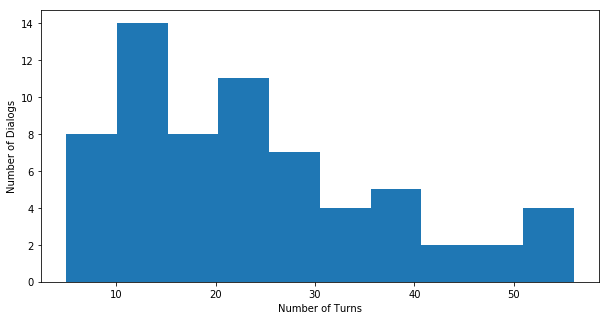

In [50]:
plt.figure(figsize=(10,5))
plt.hist(dialogs_df['dialog_id'].value_counts())
#plt.xticks(range(0, 100, 20))
plt.xlabel('Number of Turns')
plt.ylabel('Number of Dialogs')
plt.show()

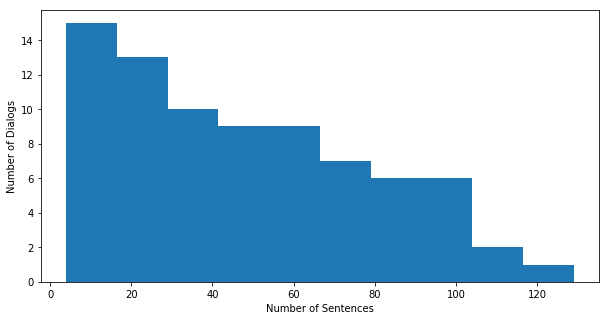

In [51]:
plt.figure(figsize=(10,5))
plt.hist(dialog_sents_df['num_sents'].tolist())
#plt.xticks(range(0, 40, 5))
plt.xlabel('Number of Sentences')
plt.ylabel('Number of Dialogs')
plt.show()

In [33]:
len(dialogs_df)

1550

In [34]:
stats.describe(dialogs_df['turn_num_tokens'])

DescribeResult(nobs=1550, minmax=(2, 418), mean=39.25354838709677, variance=2975.341094566734, skewness=2.704096480777384, kurtosis=9.26015279247572)

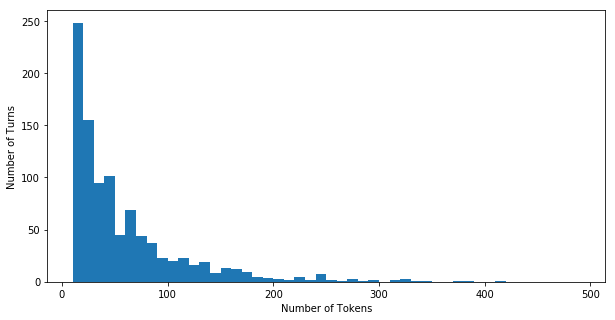

In [35]:
plt.figure(figsize=(10,5))
plt.hist(dialogs_df['turn_num_tokens'], bins=range(10, 500, 10))
#plt.xticks(range(0, 100, 20))
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Turns')
plt.show()

In [37]:
dialogs_df.dialog_id.value_counts()

music_harmony_7      56
dimensions_4         54
dimensions_7         54
dimensions_3         53
sleep_scientist_3    49
                     ..
virtual_reality_6     8
connectome_4          8
virtual_reality_3     7
blackhole_5           5
virtual_reality_4     5
Name: dialog_id, Length: 65, dtype: int64

In [ ]:
#.style.set_properties(**{'text-align': 'left'})

In [7]:
dialogs_df[dialogs_df.dialog_id=='blackhole_3'].sort_values('turn_id')[['turn_id', 'dialog_lvl', 'turn']].style.set_properties(**{'text-align': 'left'})

,turn_id,dialog_lvl,turn
715,1,child,['So have you ever heard of something called a black hole?']
751,2,child,['What is a black hole?']
716,3,child,"['Well, it has to do with, a lot with gravity,', 'do you know what gravity is?']"
752,4,child,"['No, not at all.']"
717,5,child,"[""It's what keeps us on the earth.""]"
753,6,child,['What?']
718,7,child,"[""The reason we're not just flying off the earth is"", 'because earth has gravity, so if we throw something up,', ""it comes back down, so that's why"", ""when we're walking on the earth,"", ""we don't fly off the earth because the earth has gravity,"", 'and it keeps us down.']"
754,8,child,['Nice.']
719,9,child,"['The main thing about black hole to remember is', ""that it's just, like I said, how the earth holds you down,"", 'the black hole pulls you in, as well.', 'Now, try and take the ball from me, black hole--']"
755,10,child,['Why do you hold it so tight?']


### Prepare the data for the annotation:

Generate a task file for each of the dialogs, containing speaker-role (Explainer/Explainee), turn-id, list of segments

In [3]:
dialogs_df = pd.read_json('./data/wired_parsed_ds.json')
dialogs_df.head()

,topic,youtube_link,wired_link,dialog_lvl,dialog_id,speaker_id,reciever_id,turn_id,turn,turn_sentences,turn_num_tokens
0,blockchain,https://youtu.be/hYip_Vuv8J0,https://www.wired.com/video/watch/expert-explains-one-concept-in-5-levels-of-difficulty-blockchain,self,blockchain_2,1,1,1,"[My name is Bettina Warburg., I'm a researcher of transformative technologies, and co-founder of Animal Ventures., Today, I've been challenged to explain, one concept at five levels of increasing complexity., My topic is blockchain technology., Blockchain is a new network, and it's going to help us, decentralize trade, allowing us to do a lot, of our transactions much more peer to peer directly, and lower our use of intermediaries, like companies or banks maybe., I think today everyone can leave understanding, something about blockchain at some level.]","[My name is Bettina Warburg., I'm a researcher of transformative technologies and co-founder of Animal Ventures., Today, I've been challenged to explain one concept at five levels of increasing complexity., My topic is blockchain technology., Blockchain is a new network, and it's going to help us decentralize trade, allowing us to do a lot of our transactions much more peer to peer directly and lower our use of intermediaries like companies or banks maybe., I think today everyone can leave understanding something about blockchain at some level.]",99
1,blockchain,https://youtu.be/hYip_Vuv8J0?t=37,https://www.wired.com/video/watch/expert-explains-one-concept-in-5-levels-of-difficulty-blockchain,child,blockchain_3,1,2,1,"[Do you know what we're gonna talk about today?, It's called blockchain.]","[Do you know what we're gonna talk about today?, It's called blockchain.]",17
2,blockchain,https://youtu.be/hYip_Vuv8J0?t=37,https://www.wired.com/video/watch/expert-explains-one-concept-in-5-levels-of-difficulty-blockchain,child,blockchain_3,1,2,3,"[That's a really good question., It's actually a way that we can trade., Do you know what trade is?]","[That's a really good question., It's actually a way that we can trade., Do you know what trade is?]",24
3,blockchain,https://youtu.be/hYip_Vuv8J0?t=37,https://www.wired.com/video/watch/expert-explains-one-concept-in-5-levels-of-difficulty-blockchain,child,blockchain_3,1,2,5,"[When you give up most of what you want?, Well, sometimes that definitely happens for sure., What if I told you that this is the kind of technology, that I work on that means you could trade, with any kid all over the world?]","[When you give up most of what you want?, Well, sometimes that definitely happens for sure., What if I told you that this is the kind of technology that I work on that means you could trade with any kid all over the world?]",48
4,blockchain,https://youtu.be/hYip_Vuv8J0?t=37,https://www.wired.com/video/watch/expert-explains-one-concept-in-5-levels-of-difficulty-blockchain,child,blockchain_3,1,2,7,[Yeah.],[Yeah.],2


In [4]:
dialogs_df = dialogs_df[dialogs_df.dialog_lvl != 'self']

In [5]:
dialogs = dialogs_df.dialog_id.value_counts().to_dict()
dialogs = [d for d in dialogs.items() if d[1] > 1]

In [6]:
dialogs

[('music_harmony_7', 56),
 ('dimensions_4', 54),
 ('dimensions_7', 54),
 ('dimensions_3', 53),
 ('sleep_scientist_3', 49),
 ('dimensions_5', 47),
 ('gravity_7', 44),
 ('lasers_7', 41),
 ('sleep_scientist_4', 40),
 ('gravity_3', 39),
 ('lasers_3', 37),
 ('music_harmony_4', 36),
 ('dimensions_6', 36),
 ('machine_learning_3', 35),
 ('gravity_5', 33),
 ('gravity_4', 33),
 ('blockchain_7', 31),
 ('origani_3', 30),
 ('blackhole_3', 30),
 ('gravity_6', 30),
 ('machine_learning_4', 28),
 ('lasers_4', 26),
 ('music_harmony_6', 26),
 ('nano_technology_5', 26),
 ('origani_5', 24),
 ('lasers_6', 24),
 ('origani_6', 24),
 ('machine_learning_5', 24),
 ('blockchain_4', 23),
 ('hacking_6', 23),
 ('sleep_scientist_6', 23),
 ('sleep_scientist_5', 22),
 ('nano_technology_3', 22),
 ('hacking_3', 21),
 ('nano_technology_4', 21),
 ('hacking_7', 19),
 ('hacking_5', 19),
 ('machine_learning_7', 18),
 ('hacking_4', 18),
 ('music_harmony_5', 18),
 ('origani_7', 17),
 ('origani_4', 17),
 ('blockchain_6', 17),
 (

In [7]:
len(dialogs)

65

In [8]:
import os

for did, count  in dialogs:
    tmp_df = dialogs_df[dialogs_df.dialog_id == did]
    topic = tmp_df['topic'].unique()[0]
    lvl = tmp_df['dialog_lvl'].unique()[0]
    youtube_link = tmp_df['youtube_link'].unique()[0]
    if lvl == 'self':
        continue
    tmp_df = tmp_df.sort_values('turn_id')
    tmp_df['role'] = tmp_df.speaker_id.apply(lambda x: 'Explainer' if x==1 else 'Explainee')
    tmp_df.to_json('./data/dialogs/{}.json'.format(did))
    annotation_dialog = {'dialogue': [{'author': x[0], 'text': x[1]} for x in zip(tmp_df['role'], [' '.join(x) for x in tmp_df['turn']])], 'topic': topic, 'level': lvl, 'youtube_link':youtube_link}
    json.dump(annotation_dialog, open('./data/annotation-tasks/{}-annotation-task.json'.format(did), 'w'))